# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     962.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.71e-41
Time:                        16:35:43   Log-Likelihood:                 1.7606
No. Observations:                  50   AIC:                             4.479
Df Residuals:                      46   BIC:                             12.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9988      0.083     60.220      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.48072132  4.97038253  5.42003057  5.80199702  6.09859888  6.30504376
  6.43021733  6.49522338  6.52991656  6.56799731  6.64147501  6.77540891
  6.98379097  7.26724702  7.61293392  7.99664971  8.38680984  8.74963648
  9.05470813  9.27995772  9.41529825  9.46427999  9.44350722  9.37991018
  9.30632049  9.25607706  9.25754854  9.32947246  9.47787672  9.6950892
  9.96099828 10.2463571  10.51758879 10.74230298 10.89461751 10.95941077
 10.93480614 10.83248029 10.67574478 10.49571602 10.32620291 10.19815215
 10.1345638  10.14671241 10.23229466 10.37580777 10.55109659 10.7256508
 10.86594626 10.94295293]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.92308446 10.76894881 10.50045546 10.16297567  9.81623394  9.51968542
  9.31795918  9.22993149  9.24410422  9.32142002]


## Plot comparison

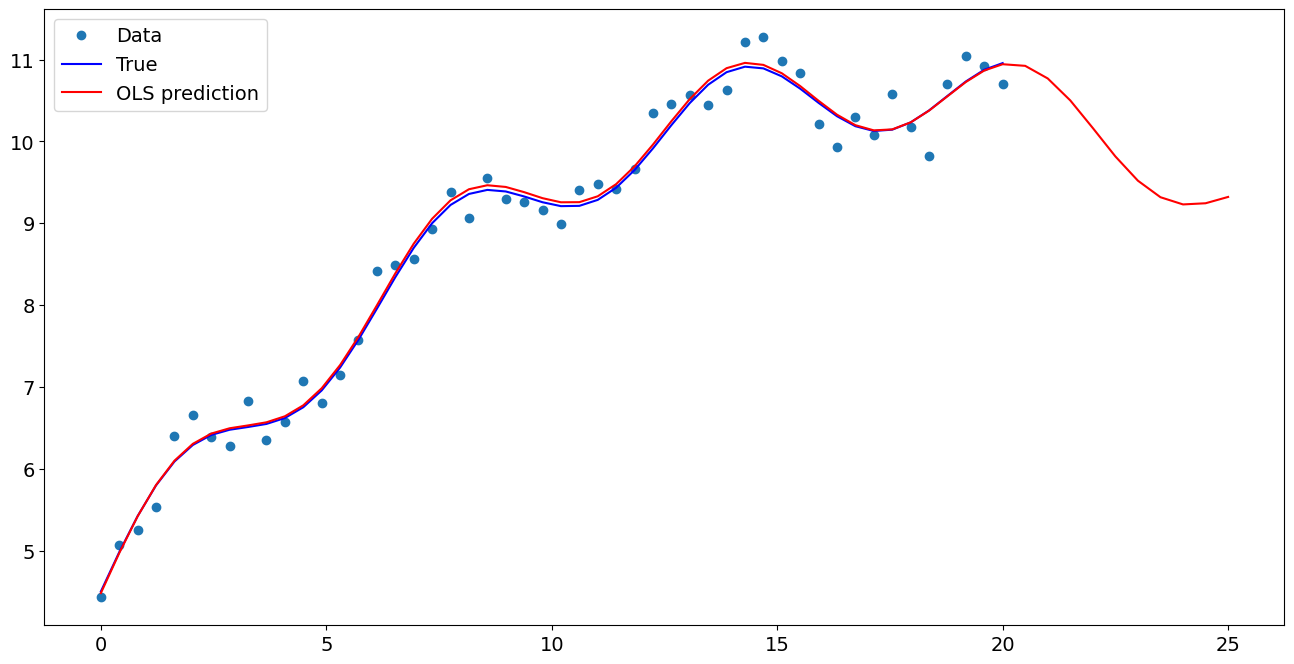

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.998829
x1                  0.507180
np.sin(x1)          0.507685
I((x1 - 5) ** 2)   -0.020724
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.923084
1    10.768949
2    10.500455
3    10.162976
4     9.816234
5     9.519685
6     9.317959
7     9.229931
8     9.244104
9     9.321420
dtype: float64